#  Markov Chain Monte Carlo (MCMC) - 01

# _Josep Fortiana_ $ \hskip3cm$ 2022-05-09

***
###### LaTeX macros
$ \def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\expdist{\operatorname{Exp}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\invgammadist}{IG}$
$\def\laplacedist{\operatorname{Laplace}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\normaldist{\operatorname{N}}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\tdist{\operatorname{t}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
***

# 01 - A first glimpse

<h2 style="color:brown"> Demo of Metropolis algorithm, Gibbs sampler, and Hamiltonian Monte Carlo</h2>

# 02 - Richard McElreath mystery code: an exercise

#### Code from: [Markov Chains: Why Walk When You Can Flow?](http://elevanth.org/blog/2017/11/28/build-a-better-markov-chain/)

The following piece of code generates a sequence $\theta$ of random numbers.

(A) Run the code and analyze the output.

(B) Identify: 

- The target pdf

- The complete Bayesian model: likelihood, prior, posterior
    
- Compare the code with the receipt for Metropolis sampling. Identify the candidate proposal pdf.

- Derive analytically the target pdf and prove that you are right by superimposing the theoretical curve on the histogram.

### Sequence length

In [1]:
n=200
#n=1e5

### Sample size

In [2]:
N<-20
prior.theta<-2
y=sum(rpois(N,prior.theta))

### Generate sequence

In [3]:
theta=rep(1,n)
for(i in 2:n){
    r=theta[i-1]
    q=exp(log(r)+rnorm(1)/9)
    theta[i]=ifelse(runif(1)<q^y*r^(-y)*exp(-20*(q-r)),q,r)
    }

### Histogram

In [4]:
options(repr.plot.width=6,repr.plot.height=6)
hist(theta,col="LightGreen",nclass=25,freq=FALSE,
     main=expression(paste("Histogram of the  ",theta,"  sequence")),cex.main=1.8)

### Trace plot _(trajectory)_

In [5]:
options(repr.plot.width=18,repr.plot.height=6)
plot(1:n,theta,"l",lwd=2,col="LightGreen",main=expression(paste("Traceplot of  ",theta)),cex.main=1.8)

### Autocorrelation function

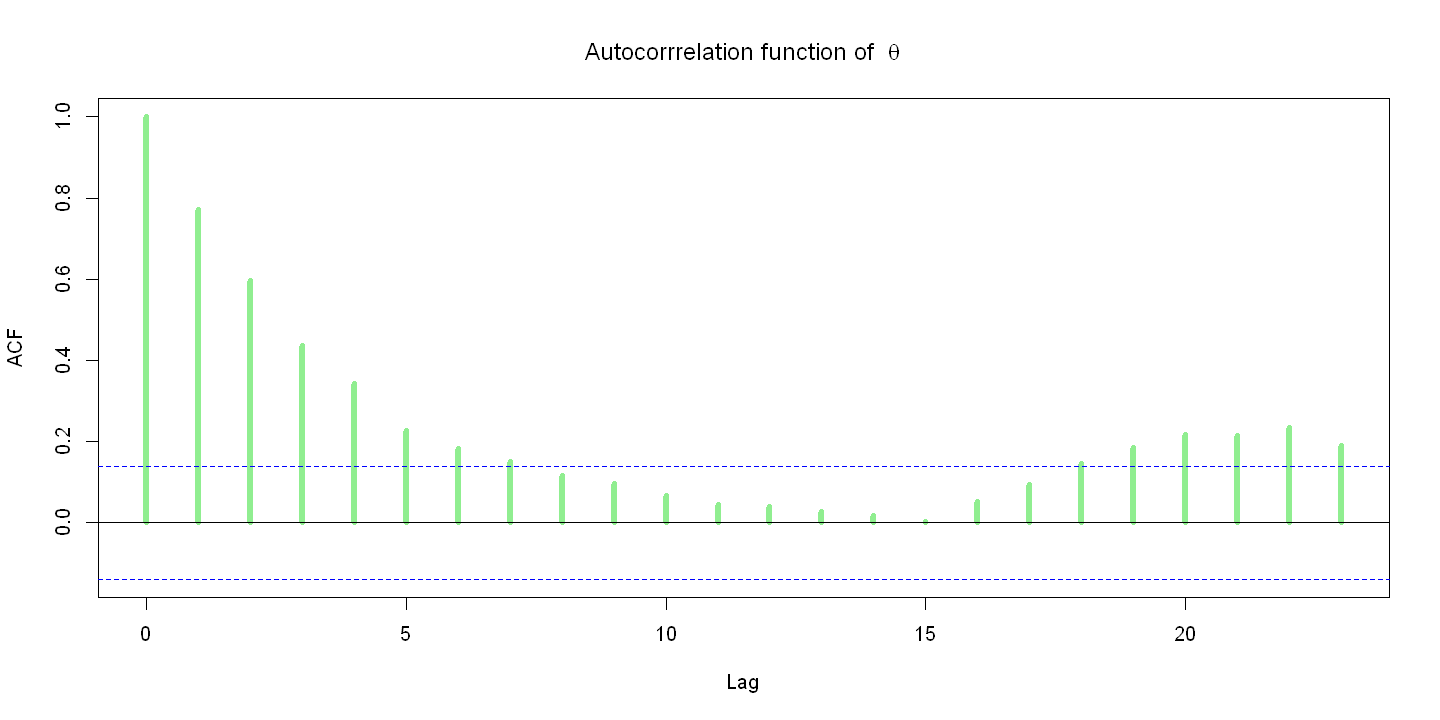

In [6]:
options(repr.plot.width=12,repr.plot.height=6)
plot(acf(theta,plot=FALSE),lwd=5,col="LightGreen",main=expression(paste("Autocorrrelation function of  ",theta)),cex.main=1.8)

### Trace plot     _(trajectory)_

## Another _(independent)_ random sequence

<h3 style="color:LimeGreen"><i>Spoiler: 
    The simulated pdf is a  $\operatorname{Gamma}(\alpha,\beta)$, with $\alpha=y$ and $\beta=N$</i></h3>

In [7]:
alpha<-y
beta<-N

In [8]:
theta.tilde<-rgamma(n,shape=alpha,rate=beta)

### Histogram

In [9]:
options(repr.plot.width=6,repr.plot.height=6)
hist(theta.tilde,col="LightGreen",nclass=25,freq=FALSE,
     main=expression(paste("Histogram of the  ",tilde(theta),"  sequence")),cex.main=1.8)

### Trace plot _(trajectory)_

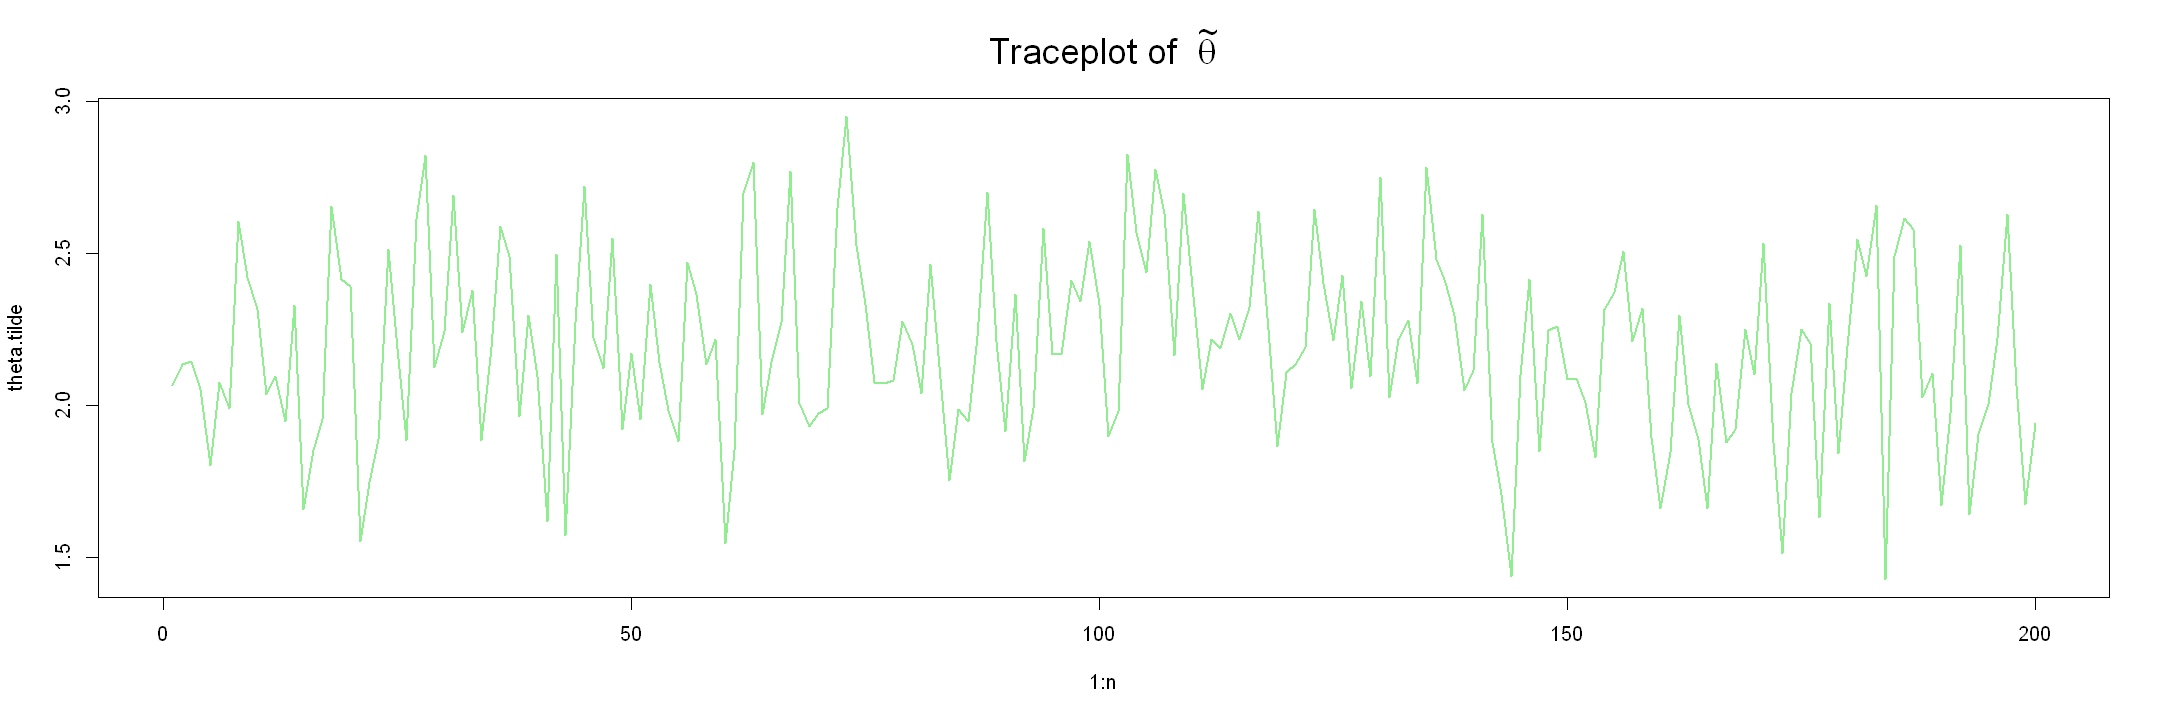

In [10]:
options(repr.plot.width=18,repr.plot.height=6)
plot(1:n,theta.tilde,"l",lwd=2,col="LightGreen",main=expression(paste("Traceplot of  ",tilde(theta))),cex.main=1.8)

### Autocorrelation function

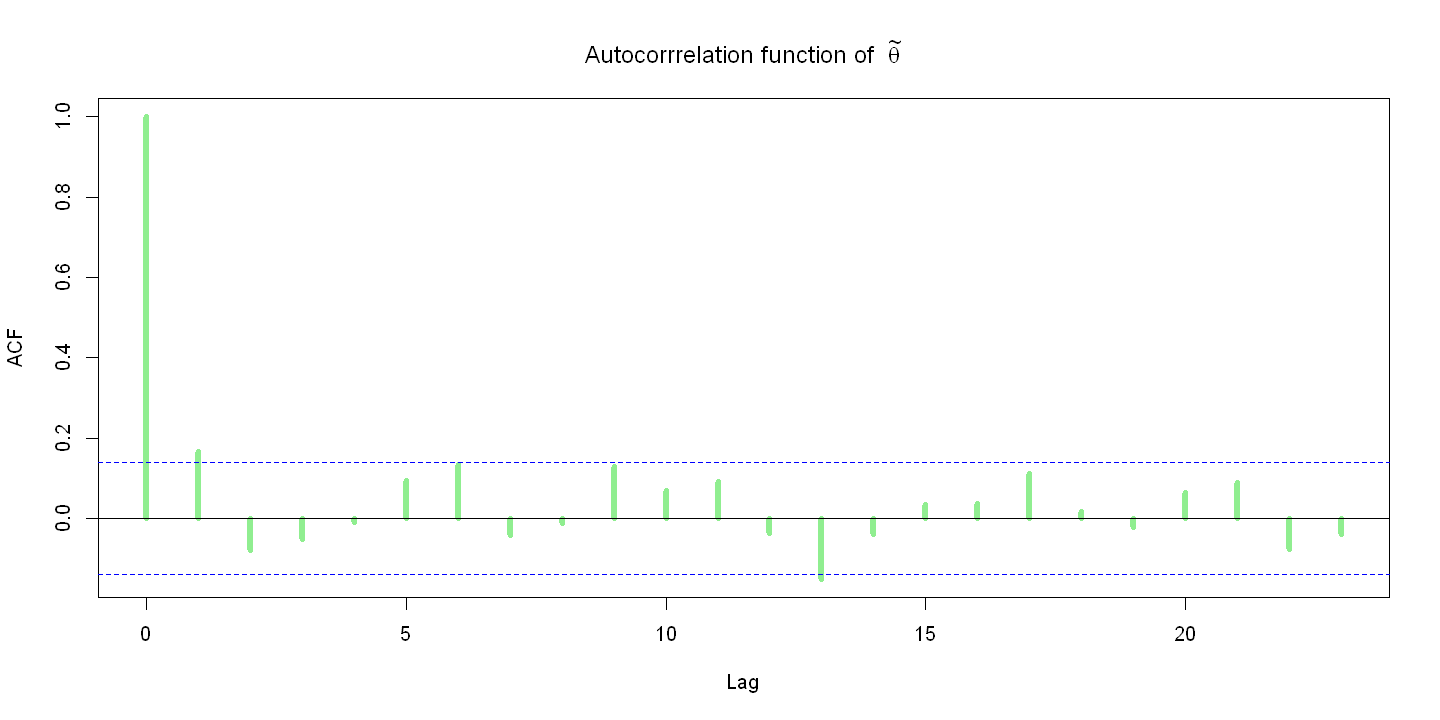

In [11]:
options(repr.plot.width=12,repr.plot.height=6)
plot(acf(theta.tilde,plot=FALSE),lwd=5,col="LightGreen",main=expression(paste("Autocorrrelation function of  ",tilde(theta))),cex.main=1.8)

# Steps in solving the mystery

<h2 style="color:Brown"><i>(To be read after the next two sections)</i></h2>

## Likelihood

From the expression:

```
y=sum(rpois(20,2))
```
we see that our model likelihood is for $N=20\;$ i.i.d. samples from a $\operatorname{Poisson}(\theta)$. Our example _observed_ data has been generated with $\theta=2$. The likelihood for a sample $(y_{1},\dots,y_{N})$ is, thus:

$$
    f((y_{1},\dots,y_{N})\,|\,\theta)
        =\prod_{i=1}^{N}\big(\exp(-\theta)\cdot \dfrac{\theta^{y_{i}}}{y_{i}!}\big)
        \propto \exp(-N\,\theta)\cdot\theta^{y},
$$
  
where $y=\sum_{i=1}^{N}y_{i}$.

## Candidate generation

From the second line in the loop:

```
q=exp(log(r)+rnorm(1)/9)
```

we see that the candidate generation process is a **Multiplicative Random Walk,** by which a candidate for the next $\theta$ is obtained by multiplying the old one by a sample from a $\operatorname{Lognormal}(0,\sigma)$ pdf, with $\sigma=1/9$. That is, 

$$
    \theta' = \theta \cdot u, \mskip10mu\text{where}\mskip10mu
    u\sim\operatorname{Lognormal}(0,\sigma),\mskip10mu\text{with}\mskip10mu\sigma=1/9.
$$

$u$ is obtained by multiplying a standard normal random number by $\sigma$ and then taking the exponential.

In general, the candidate proposal kernel for a multiplicative random walk where the "multiplicative increments" are drawn from a pdf $g(u)$,

$$
    \theta' = \theta \cdot u, \mskip10mu\text{where}\mskip10mu
    u\sim g(u),
$$

is, using both notations for kernels:

$$
    k(\theta,\theta')\equiv k(\theta'\,|\,\theta)=\dfrac{g(\theta'/\theta)}{\theta}.
$$

In [12]:
#
# Candidate generation function
#
candidate.generator<-function(r,sigma){
    return(exp(log(r)+sigma*rnorm(1)))
    }

## Posterior pdf

The code segment:

```
q^y*r^(-y)*exp(-20*(q-r))
```

where `r` is the _old_  $\theta$ and `q` is the candidate $\theta'$, must be identified with the quotient $Q$ in the acceptance probability of the Metropolis-Hastings algorithm:

$$
    Q=\dfrac{h_{y}(\theta')\cdot k(\theta\,|\,\theta')}
    {h_{y}(\theta)\cdot k(\theta'\,|\,\theta)},
$$

where $h_{y}(\theta)$ is the target function, proportional to the posterior pdf.

In order to identify $h_{y}(\theta)$, we compare:

$$
    \dfrac{h_{y}(\theta')}{h_{y}(\theta)}=Q\cdot\dfrac{k(\theta'\,|\,\theta)}{k(\theta\,|\,\theta')},
$$

where we read from the code above:

$$
    Q=\dfrac{{\theta'}^y}{{\theta}^y}\cdot\dfrac{\exp(-N\,\theta')}{\exp(-N\,\theta)}
$$

Now we compute:

$$
    \dfrac{k(\theta'\,|\,\theta)}{k(\theta\,|\,\theta')}
    =\dfrac{g(\theta'/\theta)\cdot\theta'}{g(\theta/\theta')\cdot\theta}
    =\dfrac{g(u)\cdot u}{g(1/u)},
$$

where $u=\theta'/\theta$ and $g(\,\cdot\,)$ is the $\operatorname{Lognormal}(0,\sigma)$ pdf which, in terms of $\phi$, the standard normal $\operatorname{N}(0,1)$ pdf is:

$$
    g(u)=\dfrac{1}{\sigma\,u}\cdot\phi\big(\dfrac{\log u}{\sigma}\big).
$$

Simple algebra, using the symmetry of the $\operatorname{N}(0,1)$ pdf, shows that $g(1/u)=u^2\cdot g(u)$, hence:

$$
    \dfrac{k(\theta'\,|\,\theta)}{k(\theta\,|\,\theta')}
    =\dfrac{1}{u}=\dfrac{\theta}{\theta'},\mskip15mu\text{and}\mskip15mu
        \dfrac{h_{y}(\theta')}{h_{y}(\theta)}=Q\cdot\dfrac{\theta}{\theta'}
        =\dfrac{{\theta'}^{(y-1)}}{{\theta}^{(y-1)}}\cdot\dfrac{\exp(-N\,\theta')}{\exp(-N\,\theta)}.
$$

Hence the target pdf is proportional to:

$$
    h_{y}(\theta)=\theta^{y-1}\cdot\exp(-N\,\theta),
$$

that is, the posterior pdf must be a $\operatorname{Gamma}(\alpha,\beta)$, 

$$
    f(\theta\,|\alpha,\beta)=\dfrac{\beta^{\alpha}}{\Gamma(\alpha)}\cdot\theta^{\alpha-1}
    \cdot\exp(-\beta\,\theta),\mskip20mu \theta, \alpha,\beta>0,
$$

where $\alpha=y$ and $\beta=N$.

## Prior pdf

Since the posterior pdf is a  $\operatorname{Gamma}(\alpha,\beta)$, with $\alpha=y$ and $\beta=N$ and the likelihood
is $\operatorname{Poisson}(N\,\theta)$ we see that the full model is a Gamma-Poisson conjugate model and the prior pdf must be another $\operatorname{Gamma}(\alpha_{0},\beta_{0})$, such that:

$$
    \begin{array}{lclcl}
    \alpha&=&y&=&\alpha_{0}+y,\\
    \beta&=&N   &=&\beta_{0}+N,
    \end{array} 
$$

we see that $\alpha_{0}=0$ and $\beta_{0}=0$.

That is, the prior pdf is an improper prior, which we may consider as a limit member in the $\operatorname{Gamma}$ family, namely $\operatorname{Gamma}(0,0)$. As a density function:

$$
    h(\theta)=\dfrac{1}{\theta},
$$

which is consistent with the target function $h_{y}(\theta)$ being equal (proportional) to the product of likelihood times prior :

$$
    h_{y}(\theta)=\theta^{y-1}\cdot\exp(-N\,\theta)=f((y_{1},\dots,y_{N})\,|\,\theta)\cdot h(\theta)
    =\exp(-N\,\theta)\cdot\theta^{y}\cdot\dfrac{1}{\theta},
$$

Strictly speaking, the limit of a $\operatorname{Gamma}(\alpha,\beta)$ pdf for $\alpha\to0$ and $\beta\to0$ does not exist:

$$
    \lim_{\alpha\to0}\,\lim_{\beta\to0}\,\dfrac{\beta^{\alpha}}{\Gamma(\alpha)}\cdot\theta^{\alpha-1}
    \cdot\exp(-\beta\,\theta)
$$

depends on the particular curve on the $(\alpha,\beta)$ plane along which we tend to $(0,0)$. Along the diagonal line $\beta=\alpha$, and ignoring the normalizing factor:

$$
    \lim_{\alpha\to0}\,\theta^{\alpha-1}\cdot\exp(-\alpha\,\theta)=\dfrac{1}{\theta}.
$$

Notwithstanding this mathematical result, $\operatorname{Gamma}(0,0)$ is quite commonly used, often computationally implemented as a $\operatorname{Gamma}(\alpha=0.001,\beta=0.001)$.

A discussion of this particular prior for the conjugate Poisson-Gamma model can be found at the entry
[StackExchange](https://math.stackexchange.com/questions/449234/vague-gamma-prior):

The distribution $\operatorname{Gamma}(\alpha=0.001,\beta=0.001)$ does indeed have most of its mass very close to 0, but it also has an impressive tail, so in fact its mean is $\alpha/\beta=1$.

This observation, however, is unrelated to its vagueness. It is vague in the sense that as soon as you update it based on your first empirical observation, the posterior distribution will tell you that whatever data point you observed is a very typical one. Put another way, it reflects a belief that is very weakly held and easily molded by exposure to new information.

Let's say that you're trying to estimate the average number of calls that come into a call center per hour, modeled as a Poisson distribution with rate $\theta$. $\operatorname{Gamma}(\alpha=0.001,\beta=0.001)$ reflects your prior belief about the value of $\theta$. In your first hour of observation, 50 calls come in, so you perform a Bayesian update and derive $\operatorname{Gamma}(\alpha=50.001,\beta=1.001)$ as your posterior. This posterior distribution has a mean of $50.0011.001\approx 50$. So, now that you have actual data, you've almost completely thrown away your old prejudices and updated your beliefs to match your empirical observations.

It's quite common to use $\operatorname{Gamma}(\alpha=0,\beta=0)$ as a prior. That distribution doesn't even make mathematical sense: its PDF contains the term $0^0$ and regardless whether you decide that $0^0=0$ or $0^0=1$, the total area under the distribution curve will come out to $0$ or $\infty$ respectively: not 1. Nonetheless, that doesn't stop us from using it as a prior: we'll get a sensible posterior as soon as we observe our first data point. A prior of this sort is called an improper prior. Some authors use improper and vague interchangeably.

## Compare the theoretical posterior with its MCMC simulation

In [13]:
# Parametrizing the above code
N<-20
prior.theta<-2
n<-1.0e5
sigma<-1/9
y=sum(rpois(N,prior.theta))
round(y,3)

[1] 41

In [14]:
theta=rep(1,n)
for(i in 2:n){
    r=theta[i-1]
    q=exp(log(r)+sigma*rnorm(1))
    theta[i]=ifelse(runif(1)<q^y*r^(-y)*exp(-N*(q-r)),q,r)
    }

In [16]:
burnIn<-floor(n/10)
theta<-theta[(burnIn+1):n]

[1] 0.997

[1] 3.484

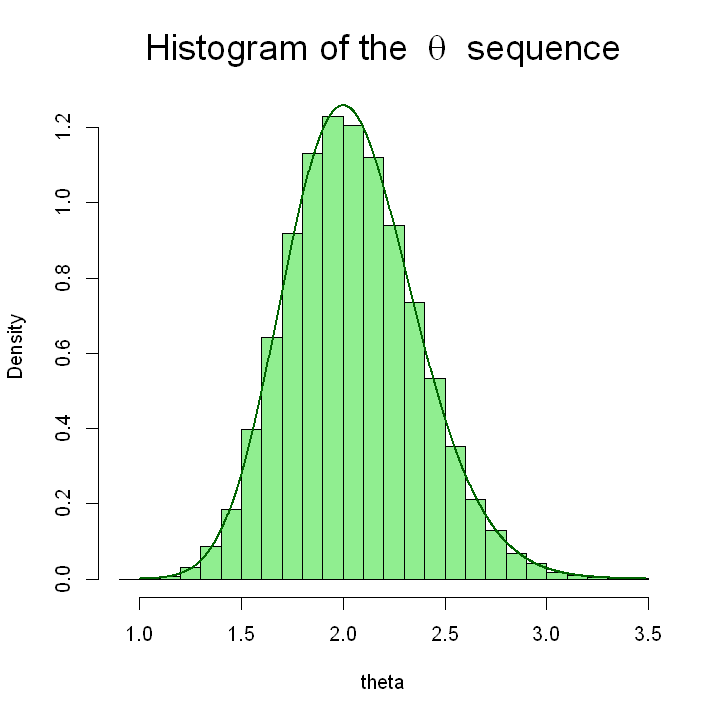

In [17]:
alpha<-y
beta<-N
m<-1000
options(repr.plot.width=6,repr.plot.height=6)
hist(theta,col="LightGreen",nclass=35,freq=FALSE,
     main=expression(paste("Histogram of the  ",theta,"  sequence")),cex.main=1.8)
theta.min<-min(theta)
theta.max<-max(theta)
round(theta.min,3)
round(theta.max,3)
theta.0<-seq(theta.min,theta.max,length=m)
lines(theta.0,dgamma(theta.0,alpha,beta),type="l",lwd=2,col="DarkGreen")

In [19]:
round(mean(theta),3)
round(alpha/beta,3)

[1] 2.047

[1] 2.05

In [20]:
round(var(theta),3)
round(alpha/beta^2,3)

[1] 0.101

[1] 0.102

# 03 - Then, what is a Markov chain?

## Example 01 - Two-state Markov chain: daily rainfall in Tel-Aviv

Occurrence of wet and dry days during the rainy period: December, January, February. 

Probability of a wet day following a dry day $\alpha=0.250$. 

Probability of a dry day following a wet day $\beta=0.338$.

From the classical article: Gabriel, K. Reuben and Neumann, J. (1962), _A Markov chain model for daily rainfall occurrence at Tel Aviv,_ Quarterly Journal of the Royal Meteorological Society 88(375):90-95.

## Data

In [21]:
# Matrix of observed data
X<-matrix(c(1049,351,350,687),nrow=2)
rownames(X)<-c("Dry","Wet")
colnames(X)<-c("Dry","Wet")
names(dimnames(X))<-c("Preceding","Actual")
X

Actual
Preceding Dry  Wet
      Dry 1049 350
      Wet  351 687

## Transition probabilities

In [22]:
# Row totals
X.rt<-apply(X,1,sum)
t(X.rt)

Dry  Wet 
[1,] 1399 1038

In [23]:
# Divide each row by its total to give an estimate of the transition matrix 
P<-sweep(X,1,X.rt,FUN="/")
# P<-diag(1/X.rt)%*%X   # Alternative method
rownames(P)<-c("Dry","Wet")   # Names MIA
round(P,3)

Actual
Preceding Dry   Wet  
      Dry 0.750 0.250
      Wet 0.338 0.662

In [24]:
alpha<-as.numeric(P[1,2])
beta<-as.numeric(P[2,1])
round(alpha,3)
round(beta,3)

[1] 0.25

[1] 0.338

## Assuming today (day 0) is a dry day

In [ ]:
p0<-c(1,0)        # State as of today
p1<-p0%*%P        # Probabilities for tomorrow
round(as.numeric(p1),3)

In [ ]:
p2<-p1%*%P        # Probabilities for the day after tomorrow
round(as.numeric(p2),3)
p<-p2

## And so on $\dots$ until stabilization

In [ ]:
p<-p%*%P
round(as.numeric(p),3)    # Execute this cell several times
p<-p%*%P
round(as.numeric(p),3) 
p<-p%*%P
round(as.numeric(p),3) 
p<-p%*%P
round(as.numeric(p),3) 

## Using the eigenvalue decomposition

In [ ]:
eP<-eigen(P)
round(eP$values,3) # First, larger eigenvalue is equal to 1 ()
D<-diag(eP$values)
U<-eP$vectors
round(U,3)
U1<-solve(U)      # Inverse matrix
round(U1,3)

## Extracting the stable probability vector

The stable vector is the first row of the matrix of left eigenvectors of $P$, the inverse matrix of $U$, the matrix of right eigenvectors of $P$, normalized to sum 1.

In [ ]:
v<-U1[1,]
p.inf<-v/sum(v)
round(p.inf,3)

# Example 02 - Weather in the Land of Oz

According to Kemeny, Snell, and Thompson (J. G. Kemeny, J. L. Snell, G. L. Thompson, _Introduction to Finite Mathematics, 3rd ed.,_	Englewood Cliffs, NJ: Prentice-Hall, 1974), the Land of Oz is blessed by many things, but not by good weather. 

They never have two nice days in a row. If they have a nice day, they are just as likely to have snow as rain the next day. If they have snow or rain, they have an even chance of having the same the next day. If there is change from snow or rain, only half of the time is this a change to a nice day. 

With this information we can write a Markov chain model for this peculiar weather. We take as states: $R$ (rainy), $N$ (nice), and $S$ (snowy).

## Exercise 

From the information given above check that:

$$
	\mathbf{P}\mskip3mu=\mskip3mu\begin{array}{c|ccc}
					&R 	&	N& S  \\
				\hline
				R 	&1/2& 1/4& 1/4 \\
		    	N 	&1/2&  0 & 1/2 \\
				S 	&1/4& 1/4& 1/2
	\end{array}
$$

is indeed the transition matrix of this model.

## Exercise

Compute the first 6 powers $\mathbf{P}^{j}$, $1\leq j\leq 6$, of the transition matrix, and use them to obtain the probabilities of each weather state on day  $j$, provided we know the weather today (day 0).

More generally, check whether this chain has a stationary probability distribution and, if so, obtain it.

In [ ]:
#
# Insert here your code
#
P<-matrix(c(1/2,1/2,1/4,1/4,0,1/4,1/4,1/2,1/2),nrow=3)
P2<-P%*%P
P3<-P%*%P2
P4<-P%*%P3
P5<-P%*%P4
P6<-P%*%P5
round(P2,3)
round(P3,3)
round(P4,3)
round(P5,3)
round(P6,3)

In [ ]:
eP<-eigen(P)
U<-eP$vectors
U1<-solve(U)      # Inverse matrix
v<-U1[1,]
p.inf<-v/sum(v)
round(p.inf,3)

# Example 03 - Ehrenfest model

## Exercise

Write a function returning the transition matrix for the Ehrenfest model for each $n$.

In [11]:
Ehrenfest.A<-function(n){
    P<-matrix(0,nrow=n+1,ncol=n+1)
    P[1,2]<-1
    P[n+1,n]<-1
    for (i in 2:n){
        P[i,i-1]<-(i-1)/n
        P[i,i+1]<-1-(i-1)/n
        }
    return(P)
    }

In [12]:
Ehrenfest.A(4)

[,1] [,2] [,3] [,4] [,5]
[1,] 0.00 1.0  0.00 0.0  0.00
[2,] 0.25 0.0  0.75 0.0  0.00
[3,] 0.00 0.5  0.00 0.5  0.00
[4,] 0.00 0.0  0.75 0.0  0.25
[5,] 0.00 0.0  0.00 1.0  0.00

[Another version, borrowed from Stackoverflow](https://stackoverflow.com/questions/28974507/efficient-creation-of-tridiagonal-matrices/28974577)

In [13]:
Ehrenfest.B<-function(n){
    P<-matrix(0,nrow=n+1,ncol=n+1)
    Ix<-1:n
    P[cbind(Ix,Ix+1)]<-(n+1-Ix)/n
    P[cbind(Ix+1,Ix)]<-Ix/n
    return(P)
    }

In [14]:
Ehrenfest.B(4)

[,1] [,2] [,3] [,4] [,5]
[1,] 0.00 1.0  0.00 0.0  0.00
[2,] 0.25 0.0  0.75 0.0  0.00
[3,] 0.00 0.5  0.00 0.5  0.00
[4,] 0.00 0.0  0.75 0.0  0.25
[5,] 0.00 0.0  0.00 1.0  0.00

## Exercise

Compute the stationary distribution of the Ehrenfest model for $n=2,3,4,5$.

In [15]:
#
# Insert here your code
#

In [16]:
limit.pmf<-function(P){
    epsilon<-1.0e-10
    eP<-eigen(P)
    U<-eP$vectors
    d<-eP$values
    j<-which(abs(d-1)<epsilon)  	# Find eigenvalue == 1
    U1<-solve(U)                	# Inverse matrix
    v<-U1[j,]
    p.inf<-v/sum(v)
    return(p.inf)
    }
Bin02<-limit.pmf(Ehrenfest.B(2))
Bin03<-limit.pmf(Ehrenfest.B(3))
Bin04<-limit.pmf(Ehrenfest.B(4))
Bin05<-limit.pmf(Ehrenfest.B(5))
round(Bin02,3)
round(Bin03,3)
round(Bin04,3)
round(Bin05,3)

[1] 0.25 0.50 0.25

[1] 0.125 0.375 0.375 0.125

[1] 0.062 0.250 0.375 0.250 0.062

[1] 0.031 0.156 0.312 0.312 0.156 0.031

In [17]:
n<-20
options(repr.plot.width=6,repr.plot.height=5)
plot(0:n,limit.pmf(Ehrenfest.B(n)),pch=19,cex=0.5,col="red",ylab="Prob",xlab="x",
     main=sprintf("Ehrenfest chain limit pmf for n = %d. ",n))

# Example 04 - Drunkard's walk

There is a sequence of $2n + 1$ pubs on a street. A drunkard starts at the middle house. At every time step, if he is at pub number $i$, then with probability $1/2$ he goes to pub number $i-1$ and with probability $1/2$ to pub $i+1$.

_Remark:_ This description does not determine completely the transition matrix, as behavior at both extreme points is not specified. There are two reasonable possibilities: either go to the (only) next pub with probability 1, as in the Ehrenfest model _(bouncing, or reflecting extremes)_ or stay forever at the reached extreme _(absorbent extremes)._

## Exercise

Check that this description can be fitted with a Markov chain model, and write its transition matrix (as a function of $n$).

In [18]:
#
# Insert here your code
#

In [19]:
# 1. With "bouncing" (reflecting) extreme points.
Drunkard.1A<-function(n){
    nn<-2*n+1
    P<-matrix(0,nrow=nn,ncol=nn)
    P[1,2]<-1
    P[nn,nn-1]<-1
    for (i in 2:(nn-1)){
        P[i,i-1]<-1/2
        P[i,i+1]<-1/2
        }
    return(P)
    }

In [20]:
Drunkard.1A(2)

[,1] [,2] [,3] [,4] [,5]
[1,] 0.0  1.0  0.0  0.0  0.0 
[2,] 0.5  0.0  0.5  0.0  0.0 
[3,] 0.0  0.5  0.0  0.5  0.0 
[4,] 0.0  0.0  0.5  0.0  0.5 
[5,] 0.0  0.0  0.0  1.0  0.0

In [21]:
# 1. With "bouncing" (reflecting) extreme points.
Drunkard.1B<-function(n){
    nn<-2*n+1
    P<-matrix(0,nrow=nn,ncol=nn)
    Ix<-1:(nn-1)
    P[cbind(Ix,Ix+1)]<-0.5
    P[cbind(Ix+1,Ix)]<-0.5
    P[1,2]<-1
    P[nn,nn-1]<-1
    return(P)
    }

In [22]:
Drunkard.1B(2)

[,1] [,2] [,3] [,4] [,5]
[1,] 0.0  1.0  0.0  0.0  0.0 
[2,] 0.5  0.0  0.5  0.0  0.0 
[3,] 0.0  0.5  0.0  0.5  0.0 
[4,] 0.0  0.0  0.5  0.0  0.5 
[5,] 0.0  0.0  0.0  1.0  0.0

In [23]:
# 2. With absorbent extreme points.
Drunkard.2A<-function(n){
    nn<-2*n+1
    P<-matrix(0,nrow=nn,ncol=nn)
    P[1,1]<-1
    P[nn,nn]<-1
    for (i in 2:(nn-1)){
        P[i,i-1]<-1/2
        P[i,i+1]<-1/2
        }
    return(P)
    }

In [24]:
Drunkard.2A(2)

[,1] [,2] [,3] [,4] [,5]
[1,] 1.0  0.0  0.0  0.0  0.0 
[2,] 0.5  0.0  0.5  0.0  0.0 
[3,] 0.0  0.5  0.0  0.5  0.0 
[4,] 0.0  0.0  0.5  0.0  0.5 
[5,] 0.0  0.0  0.0  0.0  1.0

In [25]:
Drunkard.2A(3)

[,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,] 1.0  0.0  0.0  0.0  0.0  0.0  0.0 
[2,] 0.5  0.0  0.5  0.0  0.0  0.0  0.0 
[3,] 0.0  0.5  0.0  0.5  0.0  0.0  0.0 
[4,] 0.0  0.0  0.5  0.0  0.5  0.0  0.0 
[5,] 0.0  0.0  0.0  0.5  0.0  0.5  0.0 
[6,] 0.0  0.0  0.0  0.0  0.5  0.0  0.5 
[7,] 0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [26]:
# 2. With absorbent extreme points.
Drunkard.2B<-function(n){
    nn<-2*n+1
    P<-matrix(0,nrow=nn,ncol=nn)
    Ix<-2:(nn-1)
    P[cbind(Ix,Ix+1)]<-0.5
    P[cbind(Ix,Ix-1)]<-0.5
    P[1,1]<-1
    P[nn,nn]<-1
    return(P)
    }

In [27]:
Drunkard.2B(2)

[,1] [,2] [,3] [,4] [,5]
[1,] 1.0  0.0  0.0  0.0  0.0 
[2,] 0.5  0.0  0.5  0.0  0.0 
[3,] 0.0  0.5  0.0  0.5  0.0 
[4,] 0.0  0.0  0.5  0.0  0.5 
[5,] 0.0  0.0  0.0  0.0  1.0

In [28]:
Drunkard.2B(3)

[,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,] 1.0  0.0  0.0  0.0  0.0  0.0  0.0 
[2,] 0.5  0.0  0.5  0.0  0.0  0.0  0.0 
[3,] 0.0  0.5  0.0  0.5  0.0  0.0  0.0 
[4,] 0.0  0.0  0.5  0.0  0.5  0.0  0.0 
[5,] 0.0  0.0  0.0  0.5  0.0  0.5  0.0 
[6,] 0.0  0.0  0.0  0.0  0.5  0.0  0.5 
[7,] 0.0  0.0  0.0  0.0  0.0  0.0  1.0

## Exercise

How many time steps does it take him to reach either the first or the last pub?

_Hint:_ $m$ steps correspond to $m$ coin tosses with a fair coin, and the distance from the starting point is simply the difference between the number of heads and the number of tails. We need this difference to be $n$. 

The number $X$ of heads in $m$ coin tosses is $X\sim\operatorname{Binom}(m,\frac{1}{2})$, approximately a normal distribution with the same mean and variance as the binomial, that is, mean $\frac{1}{2}\,m$ and variance $\frac{1}{4}\,m$. The difference is $D=X-(M-X)=2\,X-m$, approximately, $\operatorname{Normal}(0,m)$ (variance $\;=\,m$).

Finally, given a high probability value, $p=0.95$, say, compute the number of steps needed to reach either extreme point $\pm n$ with probability $p$. Conclude that this number is proportional to $n^2$.

In [29]:
#
# Insert here your code
#
d<-qnorm(0.90)  # Prob is 0.05 on both sides
round(d,3)
round(1/d^2,3)

[1] 1.282

[1] 0.609

Standardizing, $\dfrac{D}{\sqrt{m}}\sim\operatorname{Normal}(0,1)$, thus to satisfy the condition, we have the equation:

$$
    \dfrac{n}{\sqrt{m}}=\Phi^{-1}(0.90)=1.282, \mskip40mu\text{where $\Phi$ is the standard normal cdf}
$$

Hence, $m=\dfrac{n^2}{1.282^2}=0.609\cdot n^{2}$.

# Simulating  trajectories of Markov chains


The following function generates $n$ independent random numbers following the finite discrete distribution with vector of values $x$ and vector of probabilities $d$:

In [9]:
r.disc.rv<-function(n,x,d){
    x<-sample(x,size=n,replace=TRUE,prob=d)
    return(x)
    }

The following code generates a simulated length $n$ trajectory of a finite Markov chain with $k$ states, initial vector of probabilities $d$, and transition probabilities matrix $P$:

In [10]:
r.traj<-function(n,d,P){
    k<-length(d)
    s<-1:k
    x<-rep(0,n)
    xt<-r.disc.rv(1,s,d)
    for (t in 1:n){
        x[t]<-xt 
        xt<-r.disc.rv(1,s,P[xt,])
        }
    return(x)
    }

## Exercise

Compute and plot trajectories of the Markov chains in the examples above.

In [11]:
#
# Insert here your code
#

In [12]:
#
# Example, with the Ehrenfest Markov chain. Warning: 'r.traj()' returns a sequence of integers within the [1,n+1] interval.
# The Ehrenfest model state space is [0,n] (any actual trajectory will rarely attain large values, close to n)
#
n<-30
L<-200
options(repr.plot.width=7,repr.plot.height=5)
y<-r.traj(L,c(1,rep(0,n)),Ehrenfest.B(n))
c(min(y),max(y))
plot(1:L,y-1,"l",col="red",ylab="")               # y-1 to recover the state space

ERROR: Error in Ehrenfest.B(n): could not find function "Ehrenfest.B"


## Exercise

Write code to simulate trajectories of a Markov chain with initial probabilities vector $d$ and transition matrix $P$. A number $N$ of length $L$-trajectories. 

To simplify, assume the state space is the interval $[1,n]\subset\mathbb{N}$. If necessary, the resulting trajectories can be remapped to the actual state space.

In [34]:
#
# Insert here your code
#

In [35]:
# Generate N length L trajectories of the Markov chain with transition probabilities matrix P 
# and initial probability d. 
#
# Returns an [N,L] matrix. Each row is a trajectory.
#
N.trajectories<-function(N=500,L=100,d,P){
    trajectories<-matrix(0,nrow=N,ncol=L)
    for (i in 1:N){
        trajectories[i,]<-r.traj(L,d,P)
        }
    return(trajectories)
    }

## Exercise

Apply the code to simulate $N$ trajectories of a Markov chain to check experimentally that, indeed, after a long time the distribution of states in each of the examples above (Weather in Tel Aviv, in the Land of Oz, Ehrenfest model, drunkard's walk) approximates a stationary distribution.

In [36]:
#
# Insert here your code
#

In [37]:
N<-500
L<-100
n<-16
Z<-N.trajectories(N=N,L=L,d=c(1,rep(0,n)),P=Ehrenfest.B(n))
#str(T)

In [38]:
# Collect the last 20 terms of the N sequences
D<-20
x<-as.numeric(Z[,(L-D+1):L])
#str(x)
T<-tabulate(x,nbins=n+1) 
# values of x are in the [1,n+1] interval, so they can be entered to 'tabulate()'. Then we refer them to the [0,n] interval
# to plot their frequencies and compare them to the binomial theoretical ones.

z<-0:n
S<-round(N*20*dbinom(z,size=n,prob=0.5))

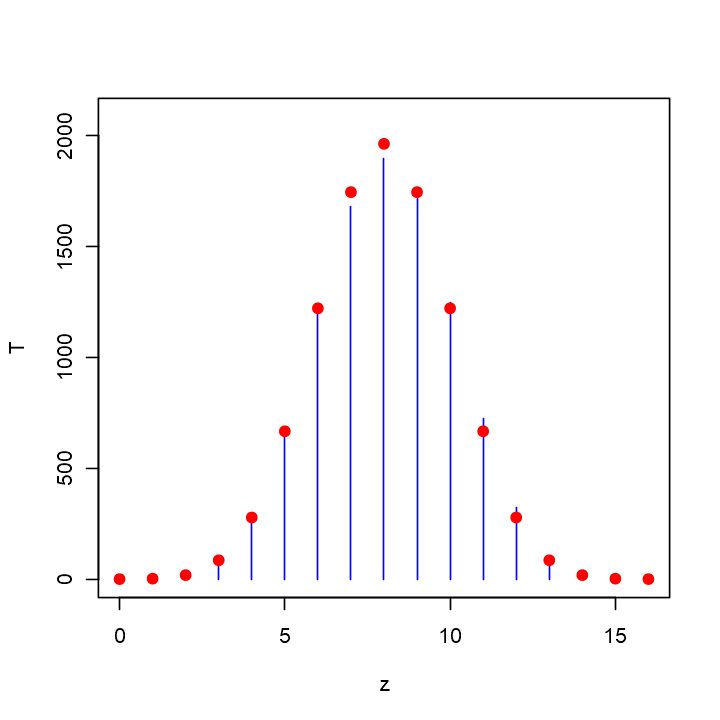

In [39]:
# Compare the frequencies from the last D terms in the sequences to the theoretical (binomial)  limit distribution
options(repr.plot.width=6,repr.plot.height=6)
plot(z,T,type="h",pch=19,col="blue",ylim=c(0,1.1*max(T)))
points(z,S,pch=19,col="red")

## Exercise

Apply the code to simulate $N$ trajectories of a Markov chain to estimate the time needed _(mixing time)_ to obtain a sufficiently good approximation to the limit distribution.

In [46]:
#
# Insert here your code
#

# Reversible Markov chains

In [47]:
P<-matrix(c(0,0.5,0,1,0,1/3,0,1/2,2/3),nrow=3)
round(P,3)

[,1] [,2]  [,3] 
[1,] 0.0  1.000 0.000
[2,] 0.5  0.000 0.500
[3,] 0.0  0.333 0.667

In [48]:
limit.pmf<-function(P){
    epsilon<-1.0e-10
    eP<-eigen(P)
    U<-eP$vectors
    d<-eP$values
    j<-which(abs(d-1)<epsilon)  	# Find eigenvalue == 1
    U1<-solve(U)                	# Inverse matrix
    v<-U1[j,]
    p.inf<-v/sum(v)
    return(p.inf)
    }
p<-limit.pmf(P)
round(p,3)

[1] 0.167 0.333 0.500

Check that this chain is reversible with respect to $p$

In [49]:
P.tilde<-diag(1/p)%*%t(P)%*%diag(p)
round(P.tilde,3)

[,1] [,2]  [,3] 
[1,] 0.0  1.000 0.000
[2,] 0.5  0.000 0.500
[3,] 0.0  0.333 0.667